# CNN 大課題

## 【課題】CNNとはどういった手法なのか記述せよ
CNNとはどういったものでしょうか。一般的なディープラーニングとの比較もしながら説明してください

## 答え：
畳込みニューラルネットワークと訳され主に画像認識に用いられる。生物の脳の視覚野に関する神経科学的知見をヒントに作られた畳込み層とプーリング層を含む順伝播型ネットワークである。一般的なディープラーニングでは入力データの形状を意識せずにひとつづきの１次元データとして扱う全結合のニューラルネットワークがよく用いられる。これに対して、CNNでは畳込み層においてデータの形状を意識する。具体的には、入力データの持っているパターンに合わせた次元数でデータを区切って、データの形状が持つ情報を失わずに扱うことができる

## 【課題】畳み込み層とプーリング層について記述せよ
CNNにおける畳み込み層とプーリング層について説明してください。パディングとストライドとは何かということも含めてください。

## 答え：
### 畳込み層
畳込み演算にバイアスを加えた結果を出力する層。畳込み演算とは、重みとして使う小さい画像であるフィルタと入力画像データとの積和演算のこと。フィルタが持つ濃淡パターンと類似した濃淡パターンが入力画像のどこにあるか検出する働きがあり、複数のフィルタを用いることで入力画像の構造的な特徴を取り出すことが可能である。  
フィルタを入力画像からはみ出す位置に置くことができないため、通常の畳込み結果の画像は入力画像より小さくなる。ここで、入力画像の縁に何らかの値を詰めて畳込み結果の画像サイズを大きくする手法をパディングという。パディングの値を０とするゼロパディングが主流だが、０は黒色を表すため畳込み結果画像の周辺部が暗くなる問題が伴う。  
フィルタを入力画像上の縦横方向に、1画素ずつではなく数画素ずつずらして畳込みを行う場合がある。このずらす間隔をストライドという。ストライドの値を増やすほど畳込み結果画像が小さくなるので、大きい入力画像を扱う場合などに２以上の値が用いられることもある。しかし、畳込み層でストライドを大きくすることは画像の特徴を取りこぼして性能悪化に繋がるという考えが一般的である

### プーリング層
畳込み層の直後に設置され、畳込み結果画像を縦横方向の空間を小さくして出力する層。畳込み層で抽出された特徴の位置に対する感度を若干低下させることで、特徴量が画像内で多少ずれていても安定した出力ができるように工夫されている。具体的には、畳込み結果画像に正方領域を当てはめてスライドさせ、各正方領域内の最大値や平均値を取り出して出力とする。この出力構造の単純さ故に、学習によって変化する重みやバイアスなどのパラメータがプーリング層にはない。  
プーリング層では畳込み結果にパディングを行うことができる。また、位置に対する感度を低下させる観点から特徴を過敏に抽出する必要がないため、ストライドには２以上を指定することが通常である  

## 【課題】CNNの精度を向上させるためにはどのようなことをするのが良いか記述せよ
CNNの精度を向上させたいときに行うことを説明してください。

## 答え：
### フィルタ数を複数にする  
　畳込み層では、フィルタが持つ濃淡パターンと類似した濃淡パターンが入力画像のどこにあるか検出する働きがあり、フィルタを複数にすれば入力画像の特徴をより多く捉える可能性が上がる

### 全結合部分の改善  
　前結合部分について、ノードを増やす、層を追加する、などにより複雑かつ表現力を高くし、畳込み層やプーリング層で抽出した特徴に対してより敏感に反応できるようにする

### 畳込み層とプーリング層をもう少し深くしてみる  
　畳込み層とプーリング層について、様々な順序で層を深く増やしていくことにより、特徴の中に含まれる更なる特徴を抽出するといった、より本質的な特徴を捉える可能性が上がる

### ドロップアウト  
　多層ネットワークのユニットを確率的に選別して学習させることにより過学習を避ける方法。具体的には、学習時の重み更新の度に、指定した割合でランダムに選出したノードを無効化する。これにより、重み更新の度に少しずつ違ったネットワークを学習していることになり、一連の学習終了後の予測では少しずつ違った多数のネットワークの答えを平均するアンサンブル効果により過学習を防ぎ、予測精度を上げることができる

### Batch Normalization  
　学習を行う際のミニバッチ毎に正規化することで、過学習と勾配消失を抑える手法。具体的には、ミニバッチ単位で前の層のデータ分布が平均０分散１となるように正規化する。これによってデータの分布の偏りを減らすことができ、過学習と勾配消失が起こりにくくなる。また、重みの初期値の影響をさほど受けずに実践できるので、活性化関数に合わせて重みの初期値を考えるなどの配慮をあまり必要としない利点もある

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import cifar10

from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

from keras.layers import Input
from keras.models import Model

from keras.layers import BatchNormalization

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## 【課題】データの読み込み

In [2]:
#CIFAR-10を読み込むコードを記述
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train.shape :  (50000, 32, 32, 3)
y_train.shape :  (50000, 1)
x_test.shape :  (10000, 32, 32, 3)
y_test.shape :  (10000, 1)
y_test[0:10] :  [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


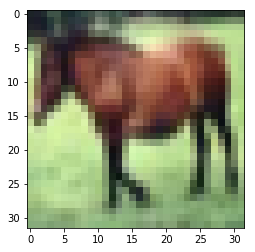

In [3]:
# データセットの確認
print('x_train.shape : ',x_train.shape)
print('y_train.shape : ',y_train.shape)
print('x_test.shape : ',x_test.shape)
print('y_test.shape : ',y_test.shape)
print('y_test[0:10] : ',y_test[0:10])

#指定したラベルのインデックスを取得する
tmp  = np.where(y_train==7)[0][0]
plt.imshow(x_train[tmp])

## 【課題】画像をまとめて表示
どのようなデータセットなのか確認するために、10種類それぞれを10枚ずつ、合計100枚の画像を表示させてください。

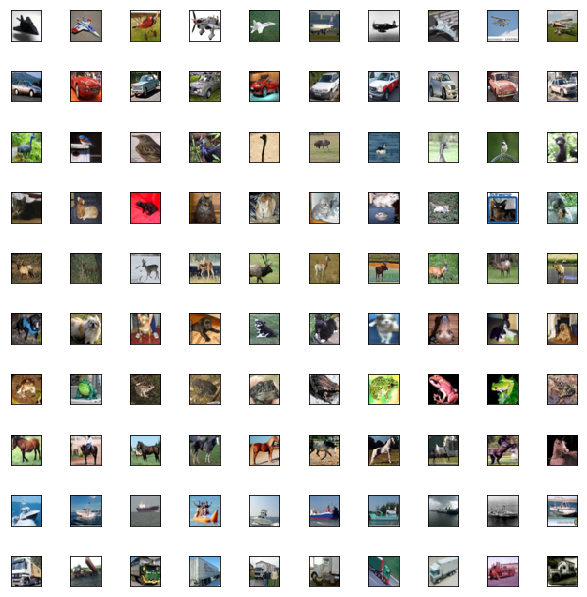

In [4]:
#画像をまとめて表示させるコードを記述
index = []
for label in range(10):
    for num in range(10):
        index.append(np.where(y_train==label)[0][num])
                
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[index[i]])

## 【課題】大きさの取得
実装1でやったように、画像サイズ、分類する数、入力データの形状を取得しましょう。

In [5]:
#画像サイズを取得
img_rows = x_train[0].shape[1]
img_cols = x_train[0].shape[0]
#分類する数を取得
num_classes = len(set(y_train.reshape(len(y_train))))
#入力データの形状を取得
input_shape = x_train.shape[1:4]

## 【課題】正規化
正規化してください。

In [6]:
#正規化するコードを記述
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## 【課題】one-hot表現への変換
正解ラベルを0か1の配列（one-hot表現）にしてください。

In [7]:
#one-hot表現にするコードを記述
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 【課題】モデルを作成
kerasを使いCNNを作成してください。どのようなモデルにするかは自由です。

In [8]:
img_input = Input(shape=input_shape)

x = Conv2D(64, kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='same',
                 activation='relu',
                 input_shape=input_shape)(img_input)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='same',
                 activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2),
                 strides=(2, 2),
                 padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

x = BatchNormalization()(x)
x = Conv2D(128, kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='same',
                 activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='same',
                 activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2),
                      strides=(2, 2),
                      padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(img_input, x)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

## 【課題】このようなモデルにした理由
このようなモデルにした理由を説明してください。

## 答え：
　基本的な構造は、keras公式githubの[CIFAR-10分類サンプルコード](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py)を流用した。将来的にskip connectionを使えるようになりたいと考え、実質はSequentialモデルだが体裁のみFunctional APIを採用した。  
　サンプルコードは２５エポックで精度７５％に至るということだったので、ここでは、１５エポックで精度７５％を上回ることを目標に以下の工夫を行った。  
- フィルタ数を増加した
- 層間をBatchNormalizationで埋めた
- optimization algorithmにAdamを指定した
- 学習時のバッチサイズを大きくした

## 【課題】CNNの実行
作成したモデルでCIFAR-10を学習し、テストデータに対する精度を求めてください。

In [9]:
#CNNを実行するコードを記述
model.fit(x_train, y_train,
          batch_size=256,
          epochs=15,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 1372s 27ms/step - loss: 1.3418 - acc: 0.5409 - val_loss: 1.0507 - val_acc: 0.6411
Epoch 2/15
50000/50000 [==============================] - 1373s 27ms/step - loss: 0.8452 - acc: 0.7051 - val_loss: 0.8448 - val_acc: 0.7044
Epoch 3/15
50000/50000 [==============================] - 1353s 27ms/step - loss: 0.6802 - acc: 0.7636 - val_loss: 0.7199 - val_acc: 0.7463
Epoch 4/15
50000/50000 [==============================] - 1370s 27ms/step - loss: 0.5815 - acc: 0.7974 - val_loss: 0.6910 - val_acc: 0.7537
Epoch 5/15
50000/50000 [==============================] - 1357s 27ms/step - loss: 0.5008 - acc: 0.8222 - val_loss: 0.7469 - val_acc: 0.7495
Epoch 6/15
50000/50000 [==============================] - 1366s 27ms/step - loss: 0.4252 - acc: 0.8508 - val_loss: 0.7199 - val_acc: 0.7650
Epoch 7/15
50000/50000 [==============================] - 1356s 27ms/step - loss: 0.3583 - acc: 0.8734 - val_l